[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM.git/master?filepath=PySDM_examples/Arabas_and_Shima_2017_Fig_5/demo.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM/blob/master/PySDM_examples/Arabas_and_Shima_2017_Fig_5/demo.ipynb)

#### based on Fig. 5 from Arabas and Shima 2017 (Nonlin. Processes Geophys. 24)  "_On the CCN (de)activation nonlinearities_"   
https://doi.org/10.5194/npg-24-535-2017

In [1]:
"""
clone and install PySDM dependencies in Colab
(to use GPU on Colab set hardware accelerator to 'GPU' before session start
in the "Runtime :: Change runtime type :: Hardware accelerator" menu)
"""
import os, sys
if 'google.colab' in sys.modules:
    %cd /content
    if not os.path.isdir('PySDM'):
        !git clone --depth 1 https://github.com/atmos-cloud-sim-uj/PySDM.git
        %cd PySDM
    else:
        %cd PySDM
        !git pull
    !pip --quiet install --requirement requirements.txt
    !ldconfig

In [2]:
import os, sys
if 'google.colab' in sys.modules:
    %cd /content/PySDM
else:
    sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [3]:
from PySDM_examples.Arabas_and_Shima_2017_Fig_5.example import Simulation, setups
from PySDM_examples.utils.show_plot import show_plot
from PySDM.physics import si
import numpy as np
import matplotlib.pyplot as plt

In [4]:
output = []
for settings in setups:
    simulation = Simulation(settings)
    output.append(simulation.run())

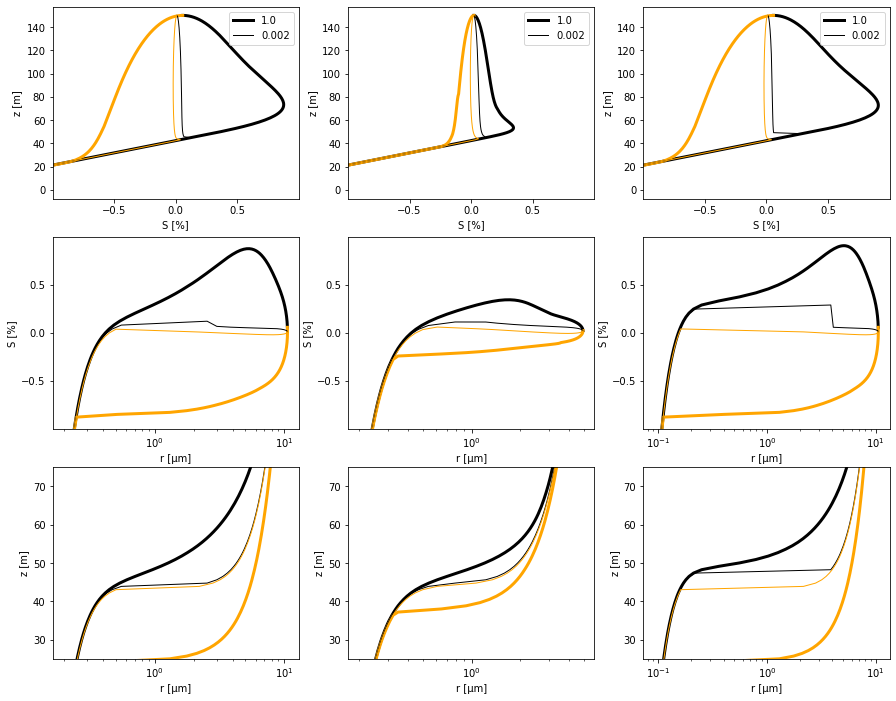

HTML(value="<a href='../utils/temporary_files/figs.pdf' target='_blank'>../utils/temporary_files/figs.pdf</a><…

In [5]:
figsize = (15, 12)
fig, axs = plt.subplots(3, 3, figsize=figsize)

linewidths = {
    100 * si.centimetre / si.second: 3,
    50 * si.centimetre / si.second: 2,
    .2 * si.centimetre / si.second: 1
}

r_label = "r [μm]"
r_unit = si.micrometre

S_ticks = (-0.5, 0, 0.5)
S_label = "S [%]"
S_unit = 0.01

z_label = "z [m]"
z_unit = si.metre

for idx in range(len(output)):
    linewidth = linewidths[setups[idx].w_avg]
    
    if setups[idx].N_STP == 50 / si.centimetre**3 and setups[idx].r_dry == 0.1 * si.micrometre: col_idx = 0
    elif setups[idx].N_STP == 500 / si.centimetre**3 and setups[idx].r_dry == 0.1 * si.micrometre: col_idx = 1
    elif setups[idx].N_STP == 50 / si.centimetre**3 and setups[idx].r_dry == 0.05 * si.micrometre: col_idx = 2
    else: assert False
        
    scale = lambda arg, unit: [x / unit for x in arg]
    split = lambda arg1, arg2: (arg1[0:np.argmax(arg2) + 1], arg1[np.argmax(arg2):-1])

    z = scale(output[idx]["z"], z_unit)
    r = scale(output[idx]["r"], r_unit)
    S = scale(output[idx]["S"], S_unit)

    z1, z2 = split(z, z)
    S1, S2 = split(S, z)
    r1, r2 = split(r, z)

    axs[0][col_idx].plot(S1, z1, color='black', linewidth=linewidth, label=setups[idx].w_avg)
    axs[0][col_idx].plot(S2, z2, color='orange', linewidth=linewidth)
    axs[0][col_idx].grid()
    axs[0][col_idx].set_xlim([-1, 1])
    axs[0][col_idx].legend()
    axs[0][col_idx].set_xticks(S_ticks)
    axs[0][col_idx].set_xlabel(S_label)
    axs[0][col_idx].set_ylabel(z_label)

    axs[1][col_idx].plot(r1, S1, color='black', linewidth=linewidth)
    axs[1][col_idx].plot(r2, S2, color='orange', linewidth=linewidth)
    axs[1][col_idx].grid()
    axs[1][col_idx].set_ylim([-1, 1])
    axs[1][col_idx].set_xscale('log')
    axs[1][col_idx].set_yticks(S_ticks)
    axs[1][col_idx].set_xlabel(r_label)
    axs[1][col_idx].set_ylabel(S_label)

    axs[2][col_idx].plot(r1, z1, color='black', linewidth=linewidth)
    axs[2][col_idx].plot(r2, z2, color='orange', linewidth=linewidth)
    axs[2][col_idx].grid()
    axs[2][col_idx].set_ylim([25, 75])
    axs[2][col_idx].set_xscale('log')
    axs[2][col_idx].set_xlabel(r_label)
    axs[2][col_idx].set_ylabel(z_label)

show_plot('figs.pdf')